In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Total households
households = pd.read_csv("/content/num_hhld.csv")

# Net disposable income (B6N)
b6n = pd.read_csv("/content/B6N.csv")

# PPP conversion
PPP_con = pd.read_csv("/content/PPS.csv")

# Household expenditure by quintile
Exp1 = pd.read_csv("/content/Exp1.csv")
Exp2 = pd.read_csv("/content/Exp2.csv")
Exp3 = pd.read_csv("/content/Exp3.csv")
Exp4 = pd.read_csv("/content/Exp4.csv")
Exp5 = pd.read_csv("/content/Exp5.csv")

# Household income shares by quintile
Inc1 = pd.read_csv("/content/Inc1.csv")
Inc2 = pd.read_csv("/content/Inc2.csv")
Inc3 = pd.read_csv("/content/Inc3.csv")
Inc4 = pd.read_csv("/content/Inc4.csv")
Inc5 = pd.read_csv("/content/Inc5.csv")

In [27]:
# Add quintile column
for i, df in enumerate([Exp1, Exp2, Exp3, Exp4, Exp5], start=1):
    df['quintile'] = i

# Concatenate all quintiles
expenditure = pd.concat([Exp1, Exp2, Exp3, Exp4, Exp5], ignore_index=True)

# Keep only year columns and melt
year_cols = ['1988','1994','1999','2005','2010','2015','2020']
expenditure_long = expenditure.melt(
    id_vars=['quintile'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Clean numeric values
expenditure_long['Value'] = expenditure_long['Value'].astype(str).str.replace(',', '').str.strip()
expenditure_long['Value'] = pd.to_numeric(expenditure_long['Value'], errors='coerce')
expenditure_long['Year'] = expenditure_long['Year'].astype(int)

In [28]:
pps_de = PPP_con[PPP_con['TIME'] == 'Germany']
pps_de = pps_de.melt(id_vars=['TIME'], var_name='Year', value_name='PPS_value')
pps_de = pps_de.drop(columns=['TIME'])
pps_de['Year'] = pps_de['Year'].astype(int)
pps_de['PPS_value'] = pd.to_numeric(pps_de['PPS_value'], errors='coerce')

In [29]:
expenditure_long = expenditure_long.merge(pps_de, on='Year', how='left')
expenditure_long['Value_EUR'] = expenditure_long['Value'] * expenditure_long['PPS_value']

# Inspect
print(expenditure_long.head())

   quintile  Year  Value  PPS_value  Value_EUR
0         1  1988    NaN        NaN        NaN
1         1  1988    NaN        NaN        NaN
2         1  1988    NaN        NaN        NaN
3         1  1988    NaN        NaN        NaN
4         1  1988    NaN        NaN        NaN


In [30]:
# Save Excel
expenditure_long.to_excel("expenditure_long_EUR.xlsx", index=False)

# Download the same file
from google.colab import files
files.download("expenditure_long_EUR.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### Income

In [31]:
print(B6N.columns)

Index(['TIME', 'Unnamed: 1', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')


In [42]:
# Replace ':' with NaN
income_data['Total_Income'] = income_data['Total_Income'].replace(':', np.nan)

# Remove commas and convert to numeric
income_data['Total_Income'] = pd.to_numeric(
    income_data['Total_Income'].astype(str).str.replace(',', ''),
    errors='coerce'
)

In [45]:
# Ensure numeric columns
income_quintile['Total_Income'] = pd.to_numeric(
    income_quintile['Total_Income'].astype(str).str.replace(',', '').str.strip(),
    errors='coerce'
)
income_quintile['Share'] = pd.to_numeric(
    income_quintile['Share'].astype(str).str.replace(',', '').str.strip(),
    errors='coerce'
)

# Now calculate total income per quintile
income_quintile['Total_Income_Quintile'] = income_quintile['Total_Income'] * income_quintile['Share'] / 100

In [47]:
# Make sure num_hhld is in long format
num_hhld_long = households.melt(id_vars=['TIME'], var_name='Year', value_name='Num_Households')
num_hhld_long['Year'] = num_hhld_long['Year'].astype(int)
num_hhld_long['Num_Households'] = pd.to_numeric(
    num_hhld_long['Num_Households'].astype(str).str.replace(',', '').str.strip(),
    errors='coerce'
)

# If we assume households are evenly distributed across quintiles:
income_quintile['Avg_HH_Income'] = income_quintile['Total_Income_Quintile'] / (num_hhld_long['Num_Households'].values[0] / 5)

# Inspect the result
print(income_quintile.head())

# Optionally save to Excel
income_quintile.to_excel("income_quintile_EUR.xlsx", index=False)
from google.colab import files
files.download("income_quintile_EUR.xlsx")

  TIME  Year  Total_Income  quintile  Share  Total_Income_Quintile  \
0   DE  2000     1278775.0       1.0    NaN                    NaN   
1   DE  2000     1278775.0       1.0    NaN                    NaN   
2   DE  2000     1278775.0       1.0    NaN                    NaN   
3   DE  2000     1278775.0       1.0    NaN                    NaN   
4   DE  2000     1278775.0       1.0    9.0              115089.75   

   Avg_HH_Income  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4      14.684123  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   quintile  Year  Value_EUR  Avg_HH_Income  Expenditure_Share
0         1  2005        NaN            NaN                NaN
1         1  2005        NaN            NaN                NaN
2         1  2005        NaN            NaN                NaN
3         1  2005        NaN      14.821811                NaN
4         1  2005        NaN            NaN                NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

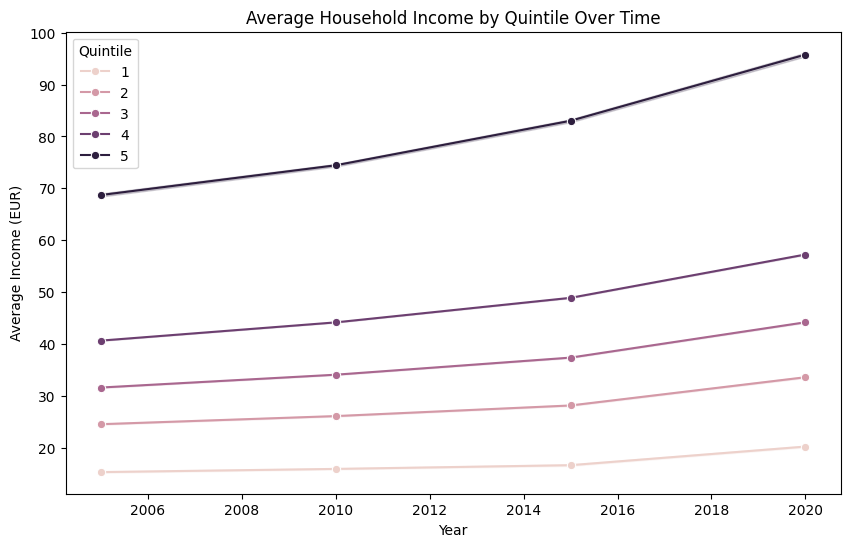

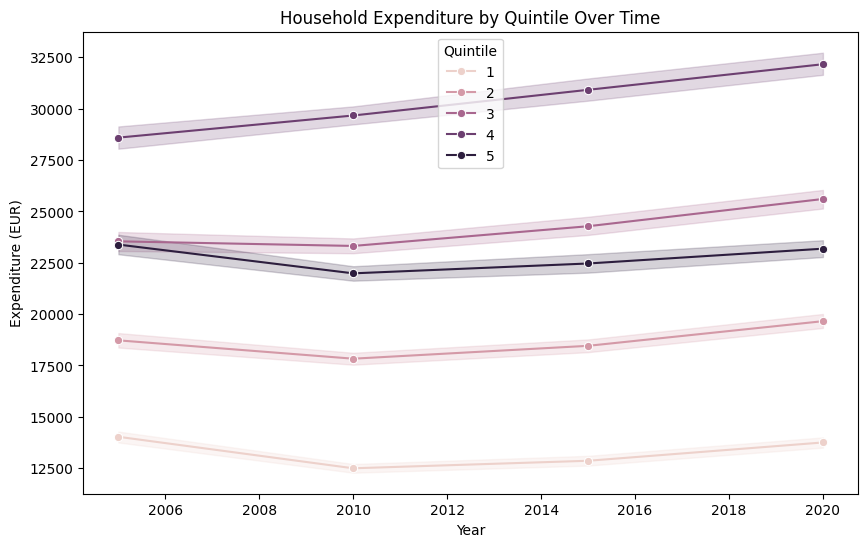

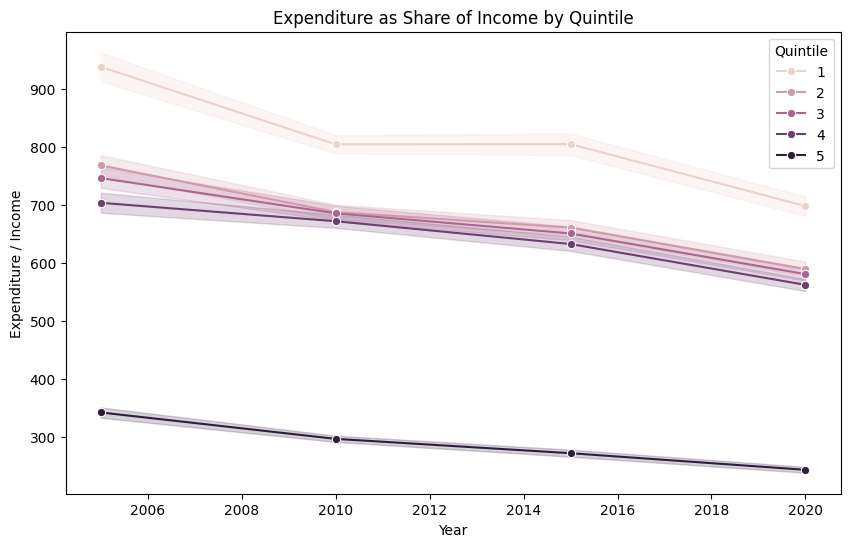

In [49]:
# --- Ensure Year columns are int ---
expenditure_long['Year'] = expenditure_long['Year'].astype(int)
income_quintile['Year'] = income_quintile['Year'].astype(int)

# --- Merge expenditure and income ---
combined = pd.merge(
    expenditure_long[['quintile', 'Year', 'Value_EUR']],
    income_quintile[['quintile', 'Year', 'Avg_HH_Income']],
    on=['quintile', 'Year'],
    how='inner'
)

# --- Calculate expenditure as share of income ---
combined['Expenditure_Share'] = combined['Value_EUR'] / combined['Avg_HH_Income']

# --- Inspect the table ---
print(combined.head())

# --- Save to Excel ---
combined.to_excel("income_expenditure_quintile.xlsx", index=False)

from google.colab import files
files.download("income_expenditure_quintile.xlsx")

# --- Visualizations ---

# 1. Line plot: Avg income over time by quintile
plt.figure(figsize=(10,6))
sns.lineplot(data=combined, x='Year', y='Avg_HH_Income', hue='quintile', marker='o')
plt.title("Average Household Income by Quintile Over Time")
plt.ylabel("Average Income (EUR)")
plt.xlabel("Year")
plt.legend(title="Quintile")
plt.show()

# 2. Line plot: Expenditure over time by quintile
plt.figure(figsize=(10,6))
sns.lineplot(data=combined, x='Year', y='Value_EUR', hue='quintile', marker='o')
plt.title("Household Expenditure by Quintile Over Time")
plt.ylabel("Expenditure (EUR)")
plt.xlabel("Year")
plt.legend(title="Quintile")
plt.show()

# 3. Expenditure as share of income
plt.figure(figsize=(10,6))
sns.lineplot(data=combined, x='Year', y='Expenditure_Share', hue='quintile', marker='o')
plt.title("Expenditure as Share of Income by Quintile")
plt.ylabel("Expenditure / Income")
plt.xlabel("Year")
plt.legend(title="Quintile")
plt.show()